In [1]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import pandas as pd
import numpy as np

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
data = pd.read_csv('team_cluster_data.csv', encoding='GBK')

In [4]:
data.head()

,国家,2019国际排名,2018世界杯排名,2015亚洲杯排名
0,中国,73,40,7
1,日本,60,15,5
2,韩国,61,19,2
3,伊朗,34,18,6
4,沙特,67,26,10


In [5]:
data.shape

(18, 4)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
国家           18 non-null object
2019国际排名     18 non-null int64
2018世界杯排名    18 non-null int64
2015亚洲杯排名    18 non-null int64
dtypes: int64(3), object(1)
memory usage: 704.0+ bytes


In [7]:
data.describe()

,2019国际排名,2018世界杯排名,2015亚洲杯排名
count,18.000000,18.000000,18.000000
mean,90.833333,38.222222,10.000000
std,35.415600,11.854786,5.434097
min,34.000000,15.000000,1.000000
25%,68.500000,32.500000,6.000000
50%,87.500000,40.000000,9.500000
75%,108.000000,50.000000,14.750000
max,164.000000,50.000000,17.000000


In [8]:
kmeans = KMeans(n_clusters=3)

In [9]:
train_x = data[["2019国际排名","2018世界杯排名","2015亚洲杯排名"]]

In [10]:
min_max_scaler = preprocessing.MinMaxScaler()
train_x = min_max_scaler.fit_transform(train_x)

In [11]:
kmeans.fit(train_x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
predict_y = kmeans.predict(train_x)

In [13]:
predict_y

array([2, 0, 0, 0, 0, 2, 1, 2, 2, 1, 1, 1, 1, 1, 0, 1, 2, 1])

In [14]:
import matplotlib.pyplot as plt

In [15]:
plt.scatter(predict_y)

TypeError: scatter() missing 1 required positional argument: 'y'

In [16]:
result = pd.concat((data,pd.DataFrame(predict_y)),axis=1)

In [17]:
result

,国家,2019国际排名,2018世界杯排名,2015亚洲杯排名,0
0,中国,73,40,7,2
1,日本,60,15,5,0
2,韩国,61,19,2,0
3,伊朗,34,18,6,0
4,沙特,67,26,10,0
5,伊拉克,91,40,4,2
6,卡塔尔,101,40,13,1
7,阿联酋,81,40,6,2
8,乌兹别克斯坦,88,40,8,2
9,泰国,122,40,17,1


In [18]:
result.rename({0:u'聚类结果'},axis=1,inplace=True)

In [19]:
result

,国家,2019国际排名,2018世界杯排名,2015亚洲杯排名,聚类结果
0,中国,73,40,7,2
1,日本,60,15,5,0
2,韩国,61,19,2,0
3,伊朗,34,18,6,0
4,沙特,67,26,10,0
5,伊拉克,91,40,4,2
6,卡塔尔,101,40,13,1
7,阿联酋,81,40,6,2
8,乌兹别克斯坦,88,40,8,2
9,泰国,122,40,17,1


In [21]:
from sklearn.manifold import TSNE

In [22]:
tsne = TSNE()

In [23]:
tsne.fit_transform(train_x)

array([[ 200.68495  ,  -56.33818  ],
       [-292.64658  ,  155.21973  ],
       [ -81.46811  ,  126.402596 ],
       [  92.24878  , -207.08748  ],
       [   9.7283535,  -34.23665  ],
       [  19.976532 ,  300.13864  ],
       [ -90.03553  , -190.88191  ],
       [ 117.098526 ,  116.79738  ],
       [  60.78936  , -399.95862  ],
       [ 330.55887  ,  111.855255 ],
       [-391.26102  ,  -28.191664 ],
       [-185.034    ,  -29.150726 ],
       [-296.87872  , -216.71167  ],
       [ 273.5171   , -289.2514   ],
       [ 222.22197  ,  296.5369   ],
       [ 394.0341   ,  -99.36887  ],
       [-155.65993  , -375.7061   ],
       [-178.68484  ,  325.85287  ]], dtype=float32)

In [25]:
tsne = pd.DataFrame(tsne.embedding_, index=pd.DataFrame(train_x).index)

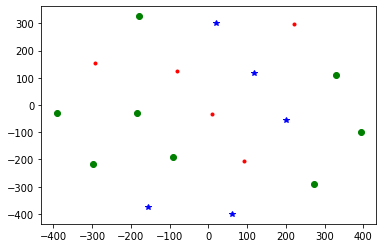

In [27]:
d=tsne[result[u'聚类结果']==0]
plt.plot(d[0],d[1],'r.')
d=tsne[result[u'聚类结果']==1]
plt.plot(d[0],d[1],'go')
d=tsne[result[u'聚类结果']==2]
plt.plot(d[0],d[1],'b*')